# 시계열 분석 연구과제
## 문제 1


temperatures_seoul 데이터는 1937년 07월 01일부터 2023년 08월 06일까지 서울의 평균 기온을 조사한 자료의 일부이다.

[예시]
날짜         평균기온(℃)
1973-07-01   22.7
1973-07-02   23.8
1973-07-03   27.2
1973-07-04   25.2
1973-07-05   26.9

이 데이터를 활용하여 조사기간동안 서울의 평균기온이 어떻게 변화하고 있는지 분석하고
앞으로 1년간의 평균 기온을 시각화 하시오.

시각화 기간은 2023년 8월 6일을 기준으로 전후 1년간으로 한다.


### #01. 준비작업
#### 1. 라이브러리 가져오기

In [39]:
# 라이브러리 기본 참조
from hossam import load_data
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import dates
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

import pandas as pd


# ARIMA
from statsmodels.tsa.arima.model import ARIMA

# 데이터 정상성 확인을 위한 ADF 검정
from statsmodels.tsa.stattools import adfuller




# ACF, PACF 테스트
from statsmodels.tsa.stattools import acf, pacf

# ACF, PACF 시각화 기능
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



#### 2. 시각화 초기화

In [3]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 3. 데이터 가져오기

In [5]:
origin = load_data('temperatures_seoul')

print("\n==== 데이터 크기 확인 ====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n==== 타입확인 ====")
print(origin.info())


[data] https://data.hossam.kr/data/lab13_/temperatures_seoul.xlsx
[desc] 1973년 7월 1일부터 2023년 8월 6일까지 서울의 일평균 기온 데이터 (출처: 기상청)
[!] Cannot read metadata

==== 데이터 크기 확인 ====
데이터셋 크기: (18299, 2)
열 개수: 2
행 개수: 18299

==== 타입확인 ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18299 entries, 0 to 18298
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       18299 non-null  datetime64[ns]
 1   평균기온(℃)  18299 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 286.1 KB
None


In [13]:
origin.tail()

,날짜,평균기온(℃)
18294,2023-08-02,29.7
18295,2023-08-03,29.5
18296,2023-08-04,30.0
18297,2023-08-05,30.3
18298,2023-08-06,29.8


#### 4. 데이터 전처리
- 시계열 인덱스 설정

In [11]:
df = origin.set_index('날짜')
df.head()

,평균기온(℃)
날짜,
1973-07-01,22.7
1973-07-02,23.8
1973-07-03,27.2
1973-07-04,25.2
1973-07-05,26.9


#### 데이터 정상성 확인
- 시계열 데이터의 파형이 평행하게 진행되어야 한다
- x 축이 시간 데이터, y 축이 연속성 데이터로 설정된 형태의 선 그래프

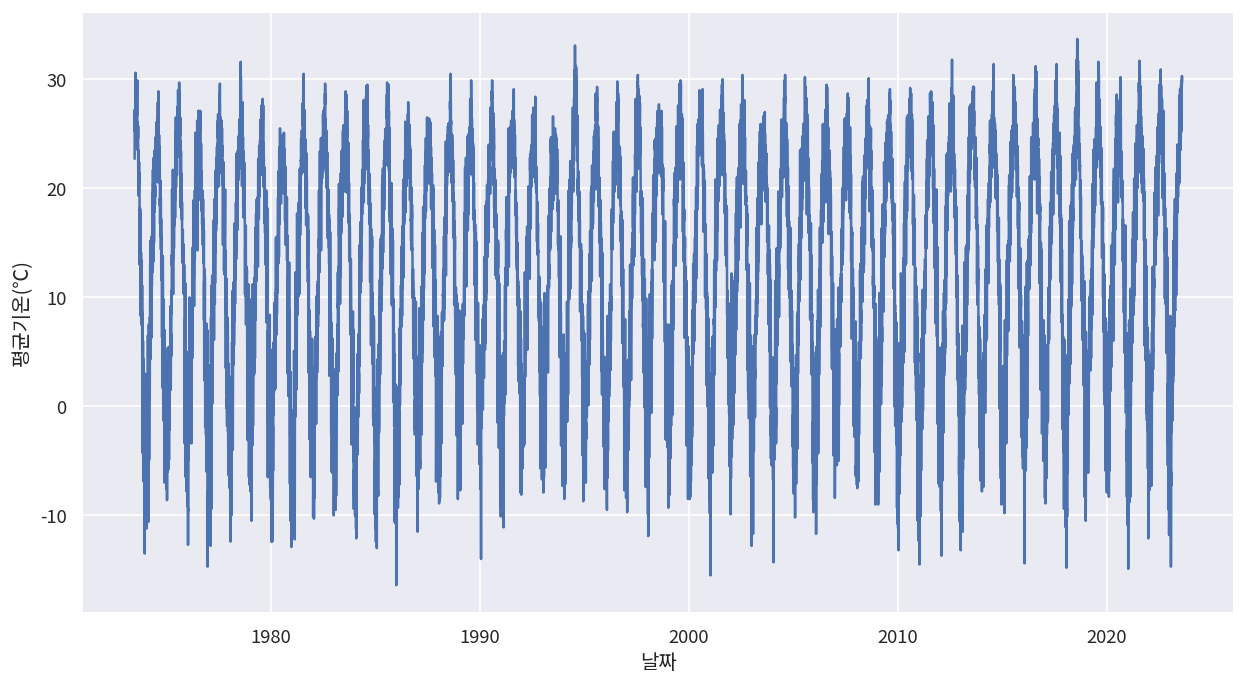

In [12]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.lineplot(
    data=origin, x='날짜', y='평균기온(℃)',
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


<정상성을 더블체크 해보자>

In [20]:
ar = adfuller(origin['평균기온(℃)'])
ar

(np.float64(-13.650422403948678),
 np.float64(1.5897525859411133e-25),
 45,
 18253,
 {'1%': np.float64(-3.430708309311788),
  '5%': np.float64(-2.861698359287901),
  '10%': np.float64(-2.5668542904669103)},
 np.float64(79977.21628763777))

In [21]:
print('검정통계량 ADF statistic : %f'%ar[0])
print('유의수준 p-value : %f'%ar[1])
print('최적차수 (num of lags): %f' %ar[2])
print('관측치 개수 (num of observations) : %f' %ar[3])
print('기각값 (critical values)')
for key,value in ar[4].items():
  print('\t%s : %.3f' %(key,value))


print('데이터 정상성 여부 : ', ' 정상성 충족' if ar[1] <= 0.05 else '정상성 충족 안함')

검정통계량 ADF statistic : -13.650422
유의수준 p-value : 0.000000
최적차수 (num of lags): 45.000000
관측치 개수 (num of observations) : 18253.000000
기각값 (critical values)
	1% : -3.431
	5% : -2.862
	10% : -2.567
데이터 정상성 여부 :   정상성 충족


> 차분이 없어도 괜찮아 보이는 파형을 지니고 있는 것으로 확인!

### 평균이동법

In [15]:
df2 = df.copy()

df2['rolling3'] = df2['평균기온(℃)'].rolling(3).mean()
df2['rolling6'] = df2['평균기온(℃)'].rolling(6).mean()
df2['rolling9'] = df2['평균기온(℃)'].rolling(9).mean()



df2.head(10)

,평균기온(℃),rolling3,rolling6,rolling9
날짜,,,,
1973-07-01,22.7,NaN,NaN,NaN
1973-07-02,23.8,NaN,NaN,NaN
1973-07-03,27.2,24.566667,NaN,NaN
1973-07-04,25.2,25.400000,NaN,NaN
1973-07-05,26.9,26.433333,NaN,NaN
1973-07-06,25.6,25.900000,25.233333,NaN
1973-07-07,25.3,25.933333,25.666667,NaN
1973-07-08,26.5,25.800000,26.116667,NaN
1973-07-09,27.0,26.266667,26.083333,25.577778


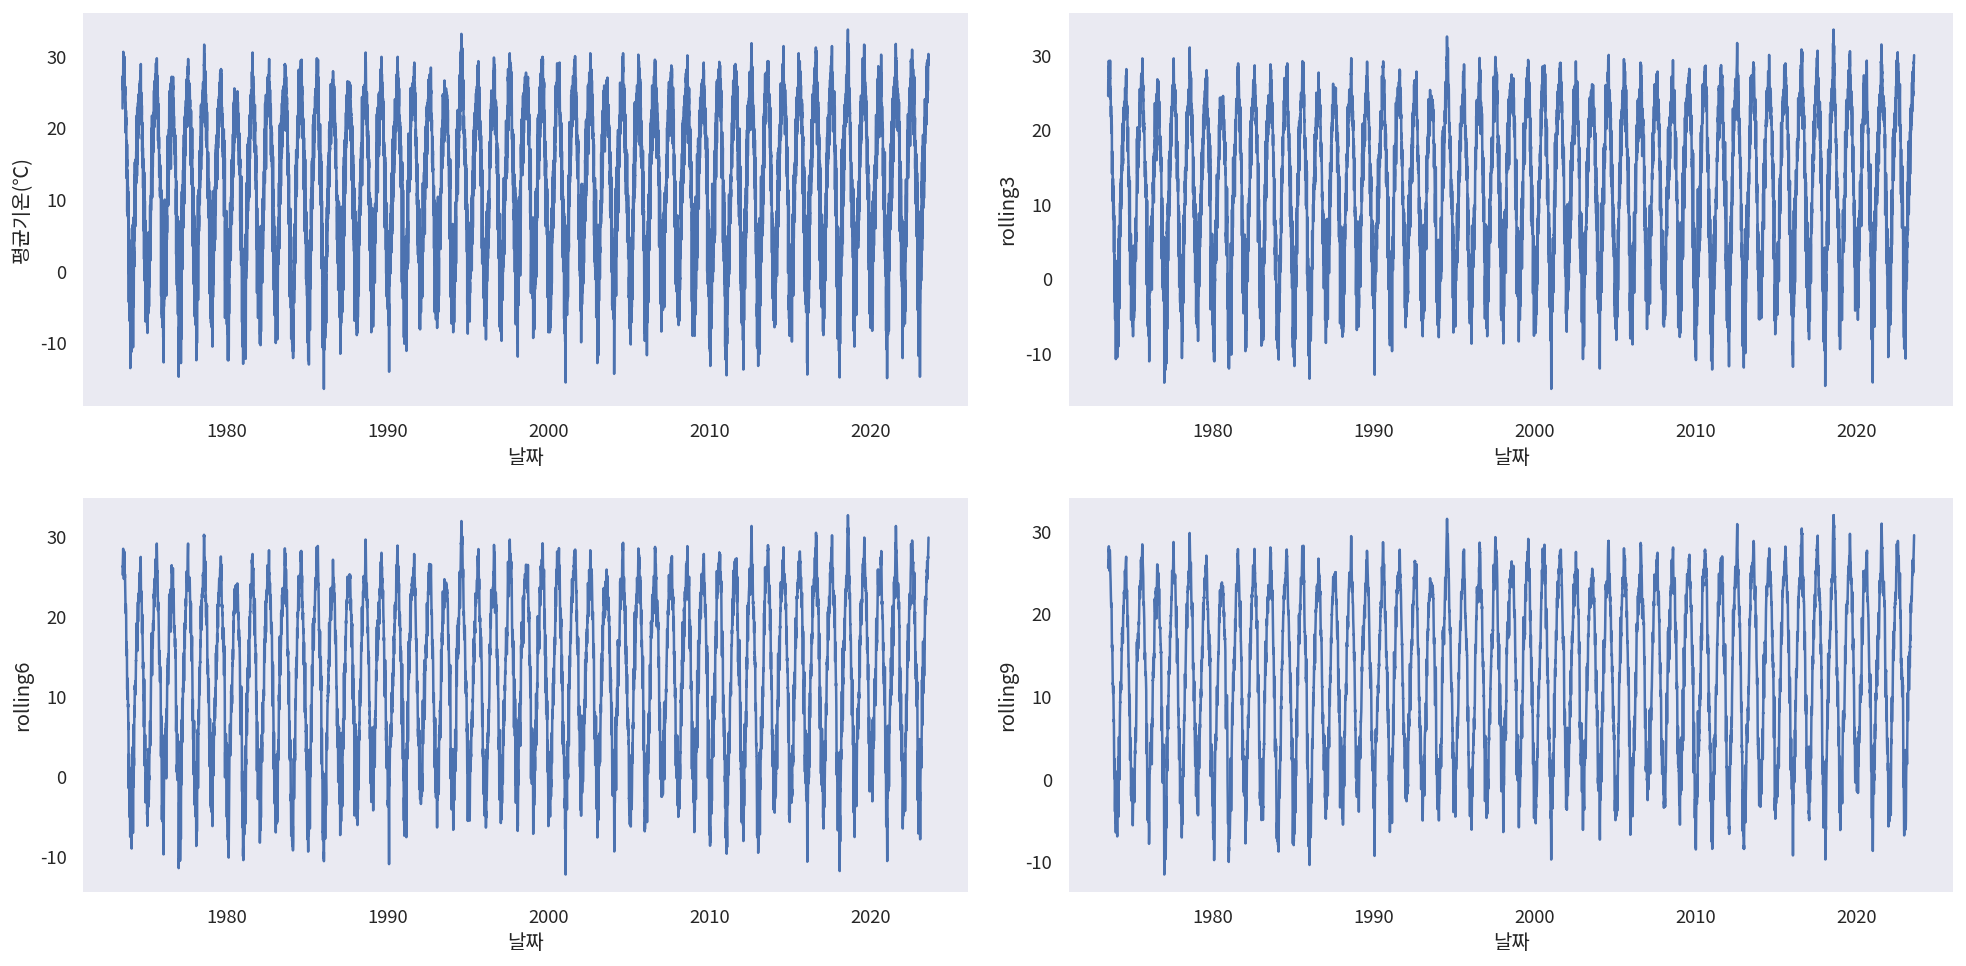

In [17]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000              # 그래프 가로 크기
height_px = 1000              # 그래프 세로 크기
rows = 2                     # 그래프 행 수
cols = 2                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용

sb.lineplot(df2,x=df2.index,y='평균기온(℃)',ax=ax[0][0])
sb.lineplot(df2,x=df2.index,y='rolling3',ax=ax[0][1])
sb.lineplot(df2,x=df2.index,y='rolling6',ax=ax[1][0])
sb.lineplot(df2,x=df2.index,y='rolling9',ax=ax[1][1])  


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


> 1년 주기의 주기 확인

- ACF 직접 계산하기! 

In [23]:
# 목적 : 과거 몇 시점(lag) 까지 현재에 영향을 주는지 자동으로 찾기

# 1. 차분된 시계열의 자기상관계수 (ACF) 계산 (lag 0 부터 시작)
acf_vals = acf(df2['평균기온(℃)'])  #이미 차분된 시계열 데이터를 acf()함수로 자기상관계수를 모두 계산한다 , 즉 지금 값이 과거의 나와 얼마나 닮았는지 숫자로 나타낸 것 


# 2. ACF 유의성 판단 기준 (근사적 95% 신뢰구간)
threshold = 2 / np.sqrt(len(df2['평균기온(℃)']))


# 3. 임계값을 초과하는 (유의한) lag 인덱스 추출
significant_lags = np.where (np.abs(acf_vals) >  threshold)[0]  

# 절대값을 씌워서 자기상관계수가 음이든 양이든 상관없이 크기만 보고, 위에서 구한 신뢰구간을 초과하는지 T/ F 로 확인 거기에서 0 번째, 즉 LAG 번호만뽑아내는 것
#WHERE는 TRUE 인 위치만 가져옴


# 4. 결과 확인
acf_vals,threshold,significant_lags


(array([1.        , 0.97460883, 0.94511196, 0.9285472 , 0.91947465,
        0.91415534, 0.91047678, 0.90711596, 0.90431141, 0.90151724,
        0.89828911, 0.89492715, 0.89218382, 0.88971586, 0.88621878,
        0.8817201 , 0.87665684, 0.87173518, 0.86543075, 0.85909572,
        0.85396835, 0.84895901, 0.84364515, 0.8380976 , 0.83146641,
        0.82433827, 0.81706648, 0.80907861, 0.80096077, 0.79250169,
        0.78439652, 0.77635241, 0.76815485, 0.75976287, 0.75072567,
        0.74139934, 0.73204298, 0.72248294, 0.71327381, 0.70422507,
        0.69432189, 0.68418413, 0.67366168]),
 np.float64(0.014784829381697078),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]))

In [24]:
# 1) ACF 계산
acf_vals = acf(df2['평균기온(℃)'])    #차분된 시계열에서 자기상관계쑤 ACF 를 계산해 배열로 저장
threshold = 2 / np.sqrt(len(df2['평균기온(℃)']))   #유의수준기준선

# 2) 결과표 생성   > 결과표 데이터 프레임 만들기 / lag 별 acf 값
df_acf = DataFrame({
    "lag": np.arange(len(acf_vals)),
    "acf": acf_vals,
})

# 3) 유의성 판단
df_acf["abs_acf"] = df_acf["acf"].abs()  #상관 방향 무시하고 크기만으로 확인
df_acf["significant"] = df_acf["abs_acf"] > threshold

# 4) 보기 좋게 정리
df_acf["acf"] = df_acf["acf"].round(3)
df_acf["abs_acf"] = df_acf["abs_acf"].round(3)
df_acf["threshold"] = round(threshold, 3)

# 5) lag=0 제외 (판정용)   > lag=0 인 경우는 자기 자신과의 비교라서 항상 1, 분석 방해함
df_acf_result = df_acf.query("lag > 0").reset_index(drop=True)

# 6) 연속 유의 구간 계산 > cut_candidate 만들기 , 즉 끊기는 지점 ㅈ찾기
df_acf_result["prev_significant"] = df_acf_result["significant"].shift(1)    #값을 한 칸 아래로 미는 것

df_acf_result["cut_candidate"] = (
    (df_acf_result["prev_significant"] == True) &
    (df_acf_result["significant"] == False)
)

df_acf_result[["lag", "acf", "significant", "cut_candidate"]]

df_acf_result



,lag,acf,abs_acf,significant,threshold,prev_significant,cut_candidate
0,1,0.975,0.975,True,0.015,NaN,False
1,2,0.945,0.945,True,0.015,True,False
2,3,0.929,0.929,True,0.015,True,False
3,4,0.919,0.919,True,0.015,True,False
4,5,0.914,0.914,True,0.015,True,False
5,6,0.910,0.910,True,0.015,True,False
6,7,0.907,0.907,True,0.015,True,False
7,8,0.904,0.904,True,0.015,True,False
8,9,0.902,0.902,True,0.015,True,False
9,10,0.898,0.898,True,0.015,True,False


In [25]:
q_candidate = (
  df_acf_result.loc[df_acf_result['cut_candidate'] , 'lag'].min() -1

)

q_candidate

nan

> 일별 기준으로 ACF 를 구하려고 했더니 lag1,2,3 모두 너무 강하게 유의해서 cut candidate 가안나오는 상황을 마주함
> 월별로 데이터를 바꿔보자

In [40]:
monthly_df = df2.resample('MS').mean()
if not isinstance(monthly_df.index, pd.PeriodIndex):
    monthly_df.index = monthly_df.index.to_period('M')
monthly_df.head()


,평균기온(℃),rolling3,rolling6,rolling9
날짜,,,,
1973-07,26.816129,26.991954,27.116026,27.180193
1973-08,25.883871,25.925806,26.000538,26.113978
1973-09,20.323333,20.560000,21.045000,21.450000
1973-10,13.038710,13.217204,13.369355,13.689247
1973-11,4.723333,5.030000,5.538333,5.932963


In [41]:
# 목적 : 과거 몇 시점(lag) 까지 현재에 영향을 주는지 자동으로 찾기

# 1. 차분된 시계열의 자기상관계수 (ACF) 계산 (lag 0 부터 시작)
acf_vals = acf(monthly_df['평균기온(℃)'])  #이미 차분된 시계열 데이터를 acf()함수로 자기상관계수를 모두 계산한다 , 즉 지금 값이 과거의 나와 얼마나 닮았는지 숫자로 나타낸 것 


# 2. ACF 유의성 판단 기준 (근사적 95% 신뢰구간)
threshold = 2 / np.sqrt(len(monthly_df['평균기온(℃)']))


# 3. 임계값을 초과하는 (유의한) lag 인덱스 추출
significant_lags = np.where (np.abs(acf_vals) >  threshold)[0]  

# 절대값을 씌워서 자기상관계수가 음이든 양이든 상관없이 크기만 보고, 위에서 구한 신뢰구간을 초과하는지 T/ F 로 확인 거기에서 0 번째, 즉 LAG 번호만뽑아내는 것
#WHERE는 TRUE 인 위치만 가져옴


# 4. 결과 확인
acf_vals,threshold,significant_lags


(array([ 1.        ,  0.84787969,  0.48126865, -0.0055675 , -0.48217852,
        -0.82360254, -0.9460269 , -0.81973117, -0.47680675, -0.00223752,
         0.47575691,  0.83063644,  0.96002913,  0.82606362,  0.46754741,
        -0.01029618, -0.47578442, -0.81004523, -0.92790324, -0.80215361,
        -0.46627265, -0.00302662,  0.46502566,  0.81188447,  0.93836364,
         0.80762621,  0.45752209, -0.00932626]),
 np.float64(0.08151391459392224),
 array([ 0,  1,  2,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19,
        20, 22, 23, 24, 25, 26]))

In [42]:
# 1) ACF 계산
acf_vals = acf(monthly_df['평균기온(℃)'])    #차분된 시계열에서 자기상관계쑤 ACF 를 계산해 배열로 저장
threshold = 2 / np.sqrt(len(monthly_df['평균기온(℃)']))   #유의수준기준선

# 2) 결과표 생성   > 결과표 데이터 프레임 만들기 / lag 별 acf 값
df_acf = DataFrame({
    "lag": np.arange(len(acf_vals)),
    "acf": acf_vals,
})

# 3) 유의성 판단
df_acf["abs_acf"] = df_acf["acf"].abs()  #상관 방향 무시하고 크기만으로 확인
df_acf["significant"] = df_acf["abs_acf"] > threshold

# 4) 보기 좋게 정리
df_acf["acf"] = df_acf["acf"].round(3)
df_acf["abs_acf"] = df_acf["abs_acf"].round(3)
df_acf["threshold"] = round(threshold, 3)

# 5) lag=0 제외 (판정용)   > lag=0 인 경우는 자기 자신과의 비교라서 항상 1, 분석 방해함
df_acf_result = df_acf.query("lag > 0").reset_index(drop=True)

# 6) 연속 유의 구간 계산 > cut_candidate 만들기 , 즉 끊기는 지점 ㅈ찾기
df_acf_result["prev_significant"] = df_acf_result["significant"].shift(1)    #값을 한 칸 아래로 미는 것

df_acf_result["cut_candidate"] = (
    (df_acf_result["prev_significant"] == True) &
    (df_acf_result["significant"] == False)
)

df_acf_result[["lag", "acf", "significant", "cut_candidate"]]

df_acf_result



,lag,acf,abs_acf,significant,threshold,prev_significant,cut_candidate
0,1,0.848,0.848,True,0.082,NaN,False
1,2,0.481,0.481,True,0.082,True,False
2,3,-0.006,0.006,False,0.082,True,True
3,4,-0.482,0.482,True,0.082,False,False
4,5,-0.824,0.824,True,0.082,True,False
5,6,-0.946,0.946,True,0.082,True,False
6,7,-0.820,0.820,True,0.082,True,False
7,8,-0.477,0.477,True,0.082,True,False
8,9,-0.002,0.002,False,0.082,True,True
9,10,0.476,0.476,True,0.082,False,False


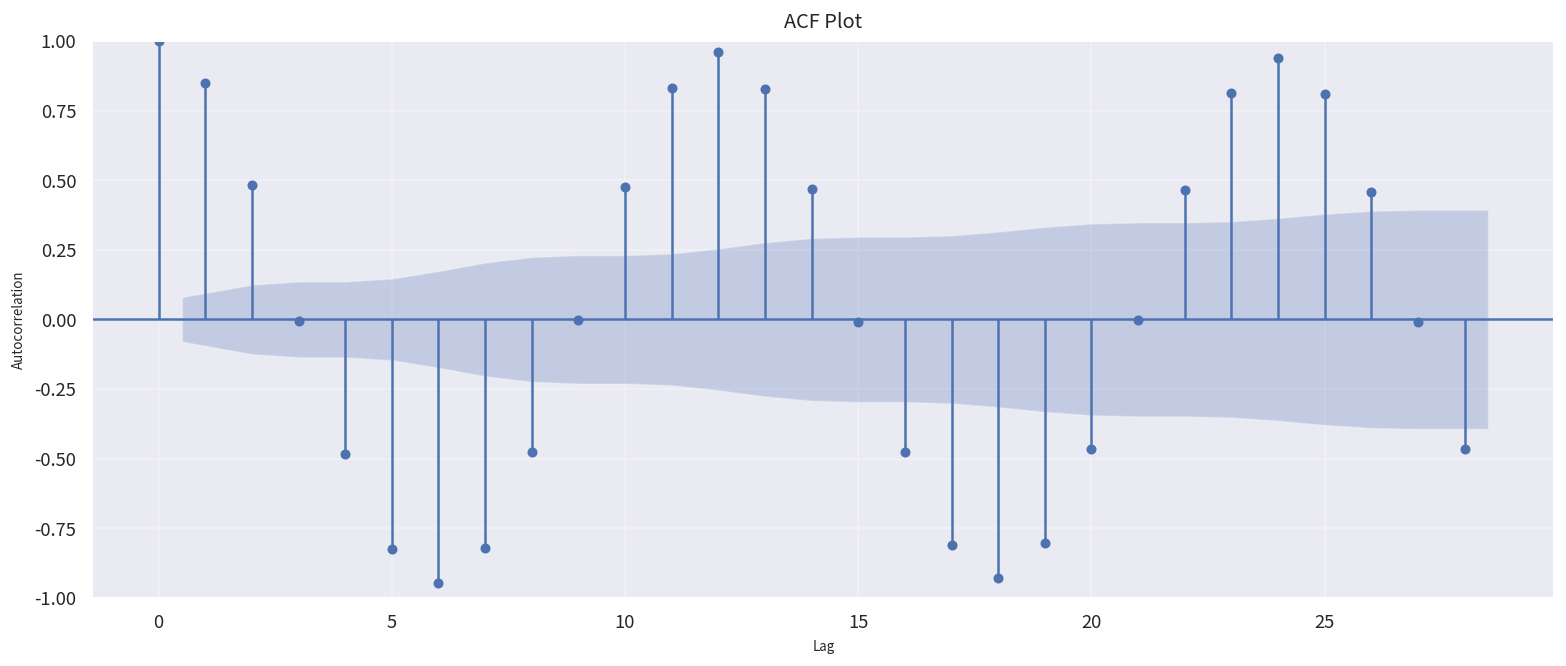

In [43]:
# 1) 그래프 초기화
width_px = 1600          # 그래프 가로 크기
height_px = 700          # 그래프 세로 크기
rows = 1                # 그래프 행 수
cols = 1                # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2-1) ACF Plot 그리기 -> ax 파라미터 필수
plot_acf(monthly_df['평균기온(℃)'], ax=ax)

# 2-2) MA(q) 후보 시각화
ax.axvline(
    x=q_candidate,
    linestyle="--",
    linewidth=1.5,
    alpha=0.8,
    color="red"
)

ax.text(
    q_candidate + 0.1,
    ax.get_ylim()[1] * 0.9,
    f"MA(q) candidate = {q_candidate}",
    fontsize=9,
    verticalalignment="top"
)

# 3) 그래프 꾸미기
ax.set_title("ACF Plot", fontsize=12, pad=8)
ax.set_xlabel("Lag", fontsize=8, labelpad=5)
ax.set_ylabel("Autocorrelation", fontsize=8, labelpad=5)
ax.grid(True, alpha=0.3)   # 배경 격자 표시

# 4) 출력
plt.tight_layout()         # 여백 제거
plt.show()                 # 그래프 화면 출력
plt.close()                # 그래프 작업 종료
